### Labb 2 Pichus or Pikachus

***Funktioner för att behandla träningsdata***

In [345]:
import numpy as np
import matplotlib.pyplot as plt
import re
import random as rnd

In [346]:
def euclidean(x1, y1, x2, y2):
    
    distance_points =np.sqrt((x1-x2)**2 + (y1-y2)**2)

    return float(distance_points)


In [347]:
with open("Data/datapoints.txt", "r") as data_read:
    
    clean_data = [pokemon.replace(" ", "").strip().split(",") for pokemon in data_read if not pokemon.startswith("(")]
    clean_data = [[float(point) for point in pokemon] for pokemon in clean_data]

    # Soretera efter typ av pokemon, 0 = "Pichu" eller 1 = "Pikachu"
    datapoints_1 = [pokemon for pokemon in clean_data if pokemon[2] == 1]
    datapoints_0 = [pokemon for pokemon in clean_data if pokemon[2] == 0]


In [348]:
with open("Data/testpoints.txt", "r") as test_read:

    clean_test = [re.sub(r"[,()]", "", pokemon).strip().split(" ") for pokemon in test_read.readlines() if not pokemon[0].isalpha()]
    clean_test = [[float(point) for point in pokemon[1:]] for pokemon in clean_test]


In [359]:
def classifier_nearst_point(nearest_points):
    
    # Kollar om närmaste punkten är en 0 = "Pichu" eller 1 = "Pikachu"
    if nearest_points[0][1] == 0:
        return "Pichu"
    if nearest_points[0][1] == 1:
        return "Pikachu"


In [360]:
def classifier_ten_nearst_point(nearest_points):
    
    count_pichu = sum(1 for vote in nearest_points if vote [1] == 0)
    count_pikachu = sum(1 for vote in nearest_points if vote [1] == 1)

    if count_pichu > count_pikachu:
        return f"Pichu med {count_pichu} röster"
    else:
        return f"Pikachu med {count_pikachu} röster"    




In [361]:
def nearst_point(testpoint, traindata):
    
    nearst_points =[]
    
    for train_point in traindata:
            calc_distance = euclidean(testpoint[0], testpoint[1], train_point[0], train_point[1])
            nearst_points.append((calc_distance, train_point[2]))
        
    nearst_points.sort()
    
    return nearst_points[:10]   
    

In [362]:
def rnd_data():
    
    # Skapar slumpade listor för test och träningsdata
    rnd_traindata = rnd.sample(datapoints_0, 50)
    rnd_traindata += rnd.sample(datapoints_1, 50)

    rnd_testdata =[point for point in clean_data if point[:2] not in rnd_traindata]

    return(rnd_testdata, rnd_traindata)

In [363]:
def calculate_accuracy():

    tp_tn = 0
    rnd_testdata, rnd_traindata = rnd_data()
    for test_point in rnd_testdata:
        result = nearst_point(test_point, rnd_traindata)
        if result[0][1] == test_point[2]:
            tp_tn += 1

    accuracy = tp_tn / len(rnd_testdata)

    return accuracy
            

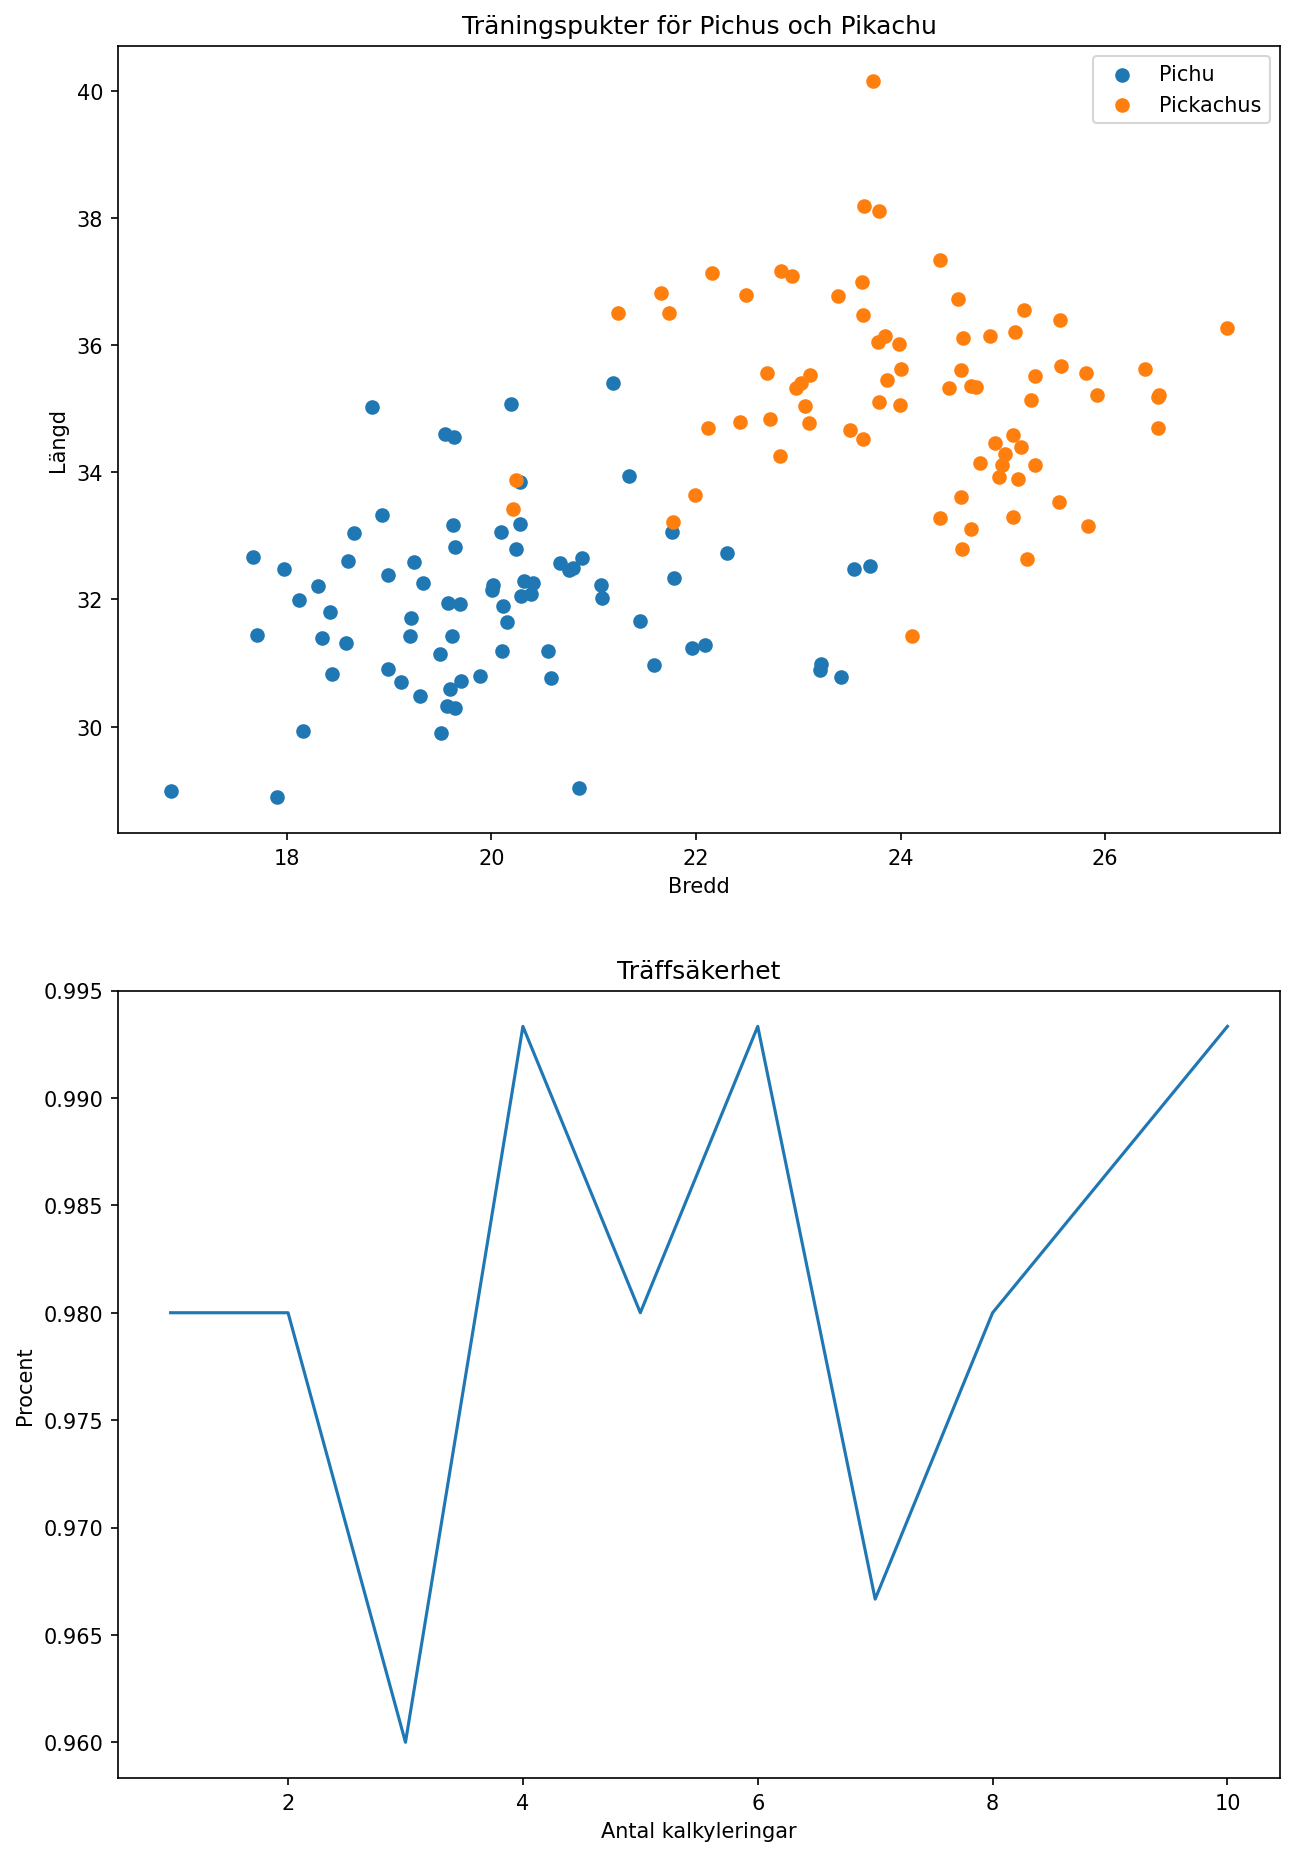

In [427]:
accuracy_resluts = [calculate_accuracy() for calculation in range(10)]

average_accuracy = sum(accuracy_resluts)/10

points_1 = [pokemon[:2] for pokemon in clean_data if pokemon[2] == 1]
points_0 = [pokemon[:2] for pokemon in clean_data if pokemon[2] == 0]

x = range(1, 11)

fig, ax = plt.subplots(2, 1, dpi=150, figsize=(10, 15))

ax[0].scatter(*zip(*points_0), label= "Pichu")
ax[0].scatter(*zip(*points_1), label= "Pickachus")
ax[0].set_title("Träningspukter för Pichus och Pikachu")
ax[0].set_xlabel("Bredd")
ax[0].set_ylabel("Längd")
ax[0].legend()


ax[1].plot(x, accuracy_resluts)
ax[1].set_title("Träffsäkerhet")
ax[1].set_xlabel("Antal kalkyleringar")
ax[1].set_ylabel("Procent")




plt.show()


